In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_csv('2015-01-01 to 2021-05-13.csv')

In [3]:
data.head()

,Date,Traded Companies,Stock Symbol,No. Of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Amount,Previous Closing,Difference Rs.,Sector
0,2015-01-01,Agriculture Development Bank Limited,ADBL,20,485.0,470.0,479.0,2695.0,1283385.0,476.0,3.0,Commercial Banks
1,2015-01-01,Apex Development Bank Ltd.,NaN,72,122.0,114.0,122.0,13099.0,1543191.0,115.0,7.0,NaN
2,2015-01-01,Araniko Development Bank Limited,NaN,19,145.0,141.0,141.0,1434.0,204744.0,145.0,-4.0,NaN
3,2015-01-01,Arun Valley Hydropower Development Co. Ltd.,AHPC,7,365.0,360.0,360.0,2812.0,1018448.0,362.0,-2.0,Hydro Power
4,2015-01-01,Asian Life Insurance Co. Limited,ALICL,14,1142.0,1111.0,1112.0,1619.0,1819799.0,1120.0,-8.0,Life Insurance


## Checkpointing

In [4]:
df=data.copy()

In [5]:
df.Date=pd.to_datetime(df.Date)

## Kumari Bank limited 

In [6]:
df_kbl=df[df['Stock Symbol']=='KBL']

## GLobal IME

In [7]:
df_global=df[df['Stock Symbol']=='GBIME']

In [8]:
df_global=df_global.sort_values('Date')

## Stock trend

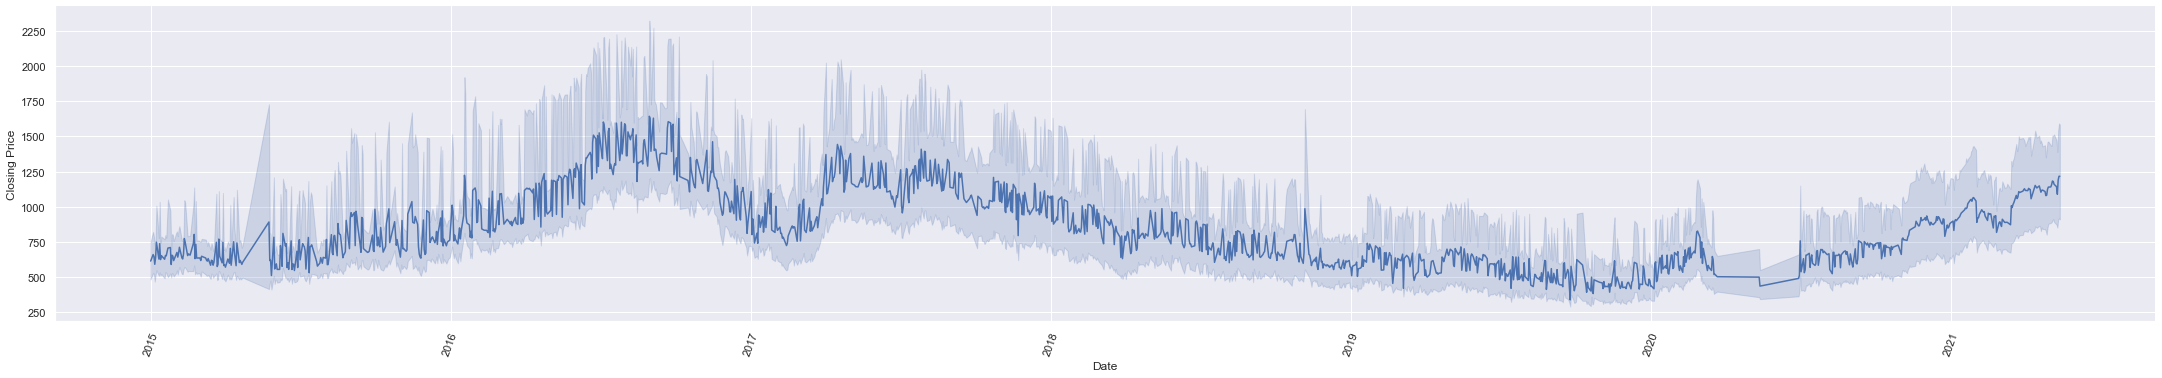

In [38]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


sns.relplot(x='Date', y='Closing Price', data=df,kind="line",aspect=6);




plt.savefig('stock trend.png')

plt.xticks(rotation=70)

plt.show()


## GLOBAL IME VS KBL 

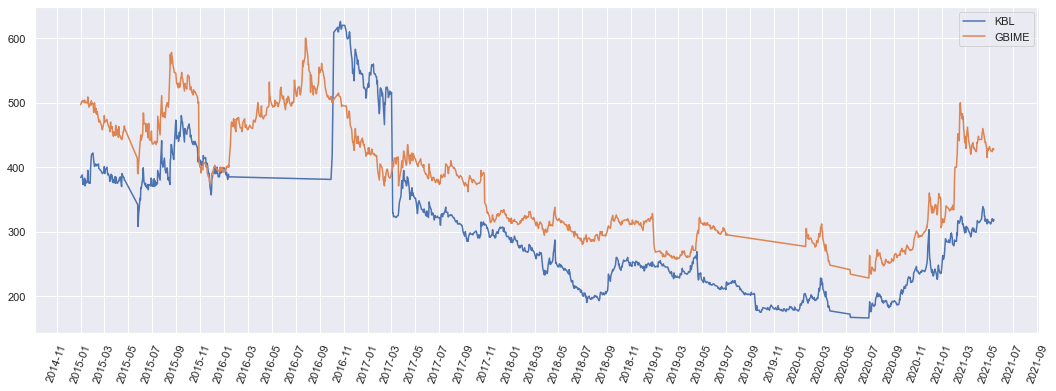

In [33]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot('Date','Closing Price',data=df[df['Stock Symbol']=='KBL'],label="KBL")
ax.plot('Date','Closing Price', data=df[df['Stock Symbol']=='GBIME'],label="GBIME")


# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)


# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
plt.xticks(rotation=70)
plt.legend()

plt.show()

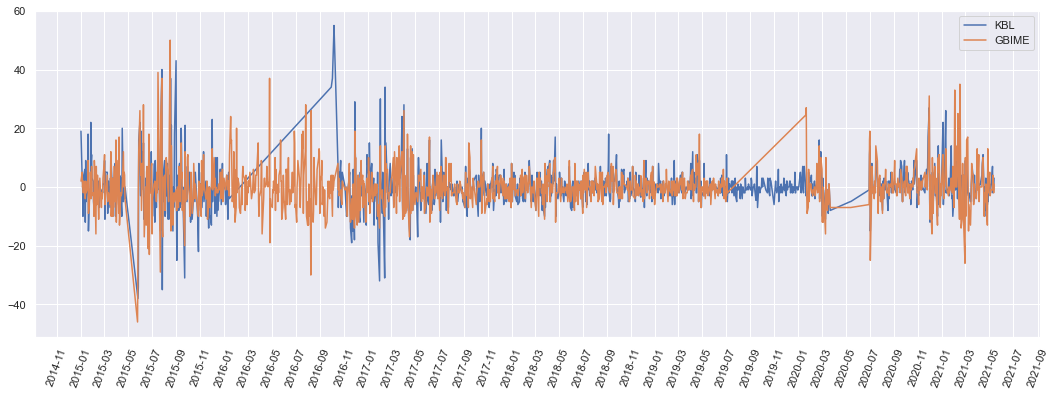

In [35]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot('Date','Difference Rs.',data=df[df['Stock Symbol']=='KBL'],label="KBL")
ax.plot('Date','Difference Rs.', data=df[df['Stock Symbol']=='GBIME'],label="GBIME")


# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)


# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
plt.xticks(rotation=70)
plt.legend()

plt.show()

In [ ]:
df_global.shape

## Life insurance

In [17]:
df_insurance=df[df['Sector']=='Life Insurance']

In [18]:
df_insurance.shape

(10234, 12)

In [22]:
df_insurance['Stock Symbol'].value_counts()

NLICL    1431
PLIC     1430
ALICL    1428
SLICL    1423
NLIC     1423
GLICL    1410
LICN     1409
RLI       166
PLI        89
JLI        25
Name: Stock Symbol, dtype: int64

In [20]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 4 to 223498
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10234 non-null  datetime64[ns]
 1   Traded Companies    10234 non-null  object        
 2   Stock Symbol        10234 non-null  object        
 3   No. Of Transaction  10234 non-null  int64         
 4   Max Price           10234 non-null  float64       
 5   Min Price           10234 non-null  float64       
 6   Closing Price       10234 non-null  float64       
 7   Traded Shares       10234 non-null  float64       
 8   Amount              10234 non-null  float64       
 9   Previous Closing    10234 non-null  float64       
 10  Difference Rs.      10234 non-null  float64       
 11  Sector              10234 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.0+ MB


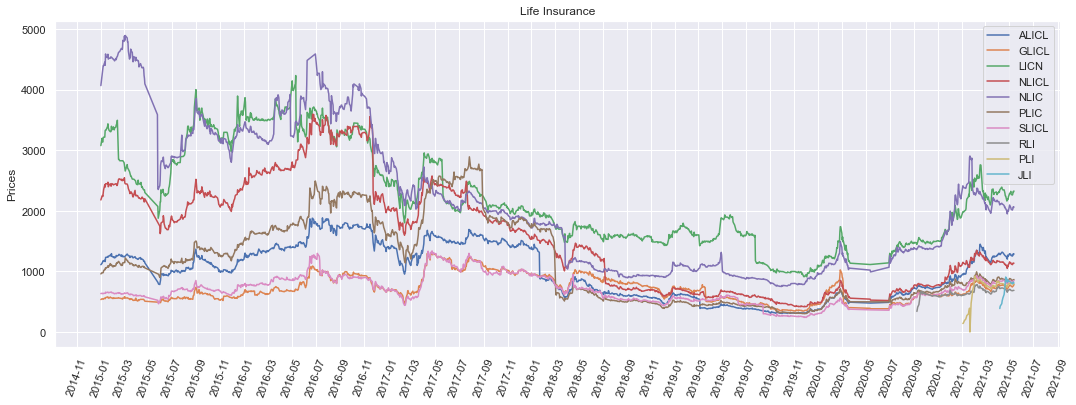

In [24]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots(figsize=(18, 6))

for items in df_insurance['Stock Symbol'].unique():
    ax.plot('Date','Closing Price',data=df[df['Stock Symbol']==items],label=items)
    #ax.plot('Date','Closing Price', data=df[df['Stock Symbol']=='GBIME'],label="GBIME")


# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)

plt.title("Life Insurance")

plt.ylabel("Prices")

plt.xticks(rotation=70)
plt.legend()
plt.savefig('insurance company.png')
plt.show()